<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Projects/15_2_Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

# The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


# About the data set


---
Iris Flower dataset is a University of California, Irvine (UCI) Database from their Machine learning depository.

UCI machine learning repository: The UCI Machine Learning Repository is a collection of databases, and data generators that are used by the machine learning community to do experiments and analysis of machine learning algorithms on data.

For the sake of this project, it has been cleaned and uploaded to github at https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv




### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns


In [118]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)


In [119]:
# the column info (how many columns, what type of data, any missing data?)
print(iris_data.info())
# print(iris_data.shape)
# print(type(iris_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [120]:
# Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
print(iris_data.head(10))
print(iris_data.tail(10))

   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
     sepal-length  sepal-width  petal-length  petal-width         species
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8  

In [121]:
print(iris_data.isnull().values.any())

False


In [122]:
# how many unique values there are in the species column
species_type = iris_data['species'].unique()
print("----The following are the three class or species types of iris in the data set ---- \n",*species_type, sep = "   ")
# count the number of distinct observations for each column 
print("\n----The number of distinct observations for each column -----")
print(iris_data.nunique())

----The following are the three class or species types of iris in the data set ---- 
   Iris-setosa   Iris-versicolor   Iris-virginica

----The number of distinct observations for each column -----
sepal-length    35
sepal-width     23
petal-length    43
petal-width     22
species          3
dtype: int64


In [123]:
print('sepal-length max=',iris_data['sepal-length'].max(),'min=',iris_data['sepal-length'].min(),'median=',iris_data['sepal-length'].median(), 'mean=',iris_data['sepal-length'].mean(), 'Q3=',iris_data['sepal-length'].quantile(.75),'Q1=',iris_data['sepal-length'].quantile(.25))
print('sepal-width max=',iris_data['sepal-width'].max(),'min=',iris_data['sepal-width'].min(),'median=',iris_data['sepal-width'].median(), 'mean=',iris_data['sepal-width'].mean(), 'Q3=',iris_data['sepal-width'].quantile(.75),'Q1=',iris_data['sepal-width'].quantile(.25))
print('petal-length max=',iris_data['petal-length'].max(),'min=',iris_data['petal-length'].min(),'median=',iris_data['petal-length'].median(), 'mean=',iris_data['petal-length'].mean(), 'Q3=',iris_data['petal-length'].quantile(.75),'Q1=',iris_data['petal-length'].quantile(.25))
print('petal-width max=',iris_data['petal-width'].max(),'min=',iris_data['petal-width'].min(),'median=',iris_data['petal-width'].median(), 'mean=',iris_data['petal-width'].mean(), 'Q3=',iris_data['petal-width'].quantile(.75),'Q1=',iris_data['petal-width'].quantile(.25))


sepal-length max= 7.9 min= 4.3 median= 5.8 mean= 5.843333333333335 Q3= 6.4 Q1= 5.1
sepal-width max= 4.4 min= 2.0 median= 3.0 mean= 3.0540000000000007 Q3= 3.3 Q1= 2.8
petal-length max= 6.9 min= 1.0 median= 4.35 mean= 3.7586666666666693 Q3= 5.1 Q1= 1.6
petal-width max= 2.5 min= 0.1 median= 1.3 mean= 1.1986666666666672 Q3= 1.8 Q1= 0.3


In [124]:
# Find out the maximum, minimum, median and upper and lower quartile values in each of the columns
print(iris_data.describe().T)

              count      mean       std  min  25%   50%  75%  max
sepal-length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal-width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal-length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal-width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [125]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Divide the data set into 70% of the rows for training and 30% for testing
train, test = train_test_split(iris_data, test_size=0.30)

### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.  For now, the indicator is the mean.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [126]:
# Check and drop any null values from each column in train dataframe
print(train.isnull().values.any())
train.dropna(subset = ["sepal-length", "sepal-width","petal-length","petal-width"])

False


,sepal-length,sepal-width,petal-length,petal-width,species
40,5.0,3.5,1.3,0.3,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
111,6.4,2.7,5.3,1.9,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,Iris-virginica
86,6.7,3.1,4.7,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor


In [127]:
print('Train shape : ',train.shape, 'Test shape : ',test.shape)
print(train.describe().T)

Train shape :  (105, 5) Test shape :  (45, 5)
              count      mean       std  min  25%  50%  75%  max
sepal-length  105.0  5.838095  0.835784  4.4  5.1  5.8  6.4  7.9
sepal-width   105.0  3.036190  0.427903  2.0  2.8  3.0  3.2  4.2
petal-length  105.0  3.739048  1.754965  1.0  1.6  4.3  5.1  6.9
petal-width   105.0  1.193333  0.762116  0.1  0.3  1.3  1.8  2.5


In [128]:
# Find the mean for each type column
sepal_length_mean = train['sepal-length'].mean()
sepal_width_mean = train['sepal-width'].mean()
petal_length_mean = train['petal-length'].mean()
petal_width_mean = train['petal-width'].mean()    
# Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.
print('sepal_length_mean = ', sepal_length_mean, ' sepal_width_mean = ', sepal_width_mean)
print('petal_length_mean = ', petal_length_mean, ' petal_width_mean =', petal_width_mean)

sepal_length_mean =  5.838095238095237  sepal_width_mean =  3.0361904761904763
petal_length_mean =  3.7390476190476205  petal_width_mean = 1.1933333333333331


In [129]:
# Another way to find the mean for each type column
train[['sepal-length','sepal-width','petal-length','petal-width']].mean()

sepal-length    5.838095
sepal-width     3.036190
petal-length    3.739048
petal-width     1.193333
dtype: float64

In [130]:
# Function encode : to encode each value into 1 (on or above indicator) and 0 (below indicator) by comparing with indicator
def encode(df, **kwds):
  key = kwds['key']
  indicator = kwds['indicator']
  if df[key] >= indicator:
    return 1
  return 0

In [131]:
# Make a new copy of train dataset for encoding
encodedmean_train = train.copy()
# Encode all values for each column comparing with mean indicator 
encodedmean_train['sepal-length'] = encodedmean_train.apply(encode, axis=1, key='sepal-length', indicator=sepal_length_mean)
encodedmean_train['sepal-width']  = encodedmean_train.apply(encode, axis=1, key='sepal-width',  indicator=sepal_width_mean)
encodedmean_train['petal-length'] = encodedmean_train.apply(encode, axis=1, key='petal-length', indicator=petal_length_mean)
encodedmean_train['petal-width']  = encodedmean_train.apply(encode, axis=1, key='petal-width',  indicator=petal_width_mean)
display(encodedmean_train)
# Find out the number of rows of each species in train dataset
print(encodedmean_train['species'].value_counts())

,sepal-length,sepal-width,petal-length,petal-width,species
40,0,1,0,0,Iris-setosa
85,1,1,1,1,Iris-versicolor
92,0,0,1,1,Iris-versicolor
111,1,0,1,1,Iris-virginica
53,0,0,1,1,Iris-versicolor
...,...,...,...,...,...
147,1,0,1,1,Iris-virginica
86,1,1,1,1,Iris-versicolor
76,1,0,1,1,Iris-versicolor
88,0,0,1,1,Iris-versicolor


Iris-versicolor    36
Iris-setosa        35
Iris-virginica     34
Name: species, dtype: int64


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the mean that are NOT Iris-virginica.  Calculate these in the same way



In [132]:
# Function to calculate the proportion of each column that are ON OR ABOVE indicator that are of a species
def cal_proportion_aboveindi(df, specie, col_name, indicator):
  train_spec = df[(df[col_name] == 1) & (df['species'] == specie)][col_name].count()
  train_all = df[df[col_name] == 1][col_name].count()
  proportion = train_spec / train_all
  print(col_name , " - Number of rows = ",  train_spec, ", Total rows above ", indicator ," = ", train_all," ,Proportion = ", proportion)
  return proportion


In [133]:
# Get the dataframes and proportion calcuations of those ABOVE the mean for 3 species
print("-----------------------------------value >= mean for Iris-virginica -----------------------------------")
prop_sl_vir_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-virginica', 'sepal-length', 'mean')
prop_sw_vir_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-virginica', 'sepal-width', 'mean') 
prop_pl_vir_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-virginica', 'petal-length', 'mean') 
prop_pw_vir_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-virginica', 'petal-width', 'mean')
   
print("-----------------------------------value >= mean for Iris-versicolor-----------------------------------")
prop_sl_ver_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-versicolor', 'sepal-length', 'mean') 
prop_sw_ver_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-versicolor', 'sepal-width', 'mean') 
prop_pl_ver_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-versicolor', 'petal-length', 'mean') 
prop_pw_ver_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-versicolor', 'petal-width', 'mean')   

print("-----------------------------------value >= mean for Iris-setosa-----------------------------------")
prop_sl_set_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-setosa', 'sepal-length', 'mean') 
prop_sw_set_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-setosa', 'sepal-width', 'mean') 
prop_pl_set_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-setosa', 'petal-length', 'mean') 
prop_pw_set_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-setosa', 'petal-width', 'mean')   


-----------------------------------value >= mean for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  29 , Total rows above  mean  =  48  ,Proportion =  0.6041666666666666
sepal-width  - Number of rows =  9 , Total rows above  mean  =  45  ,Proportion =  0.2
petal-length  - Number of rows =  34 , Total rows above  mean  =  65  ,Proportion =  0.5230769230769231
petal-width  - Number of rows =  34 , Total rows above  mean  =  64  ,Proportion =  0.53125
-----------------------------------value >= mean for Iris-versicolor-----------------------------------
sepal-length  - Number of rows =  19 , Total rows above  mean  =  48  ,Proportion =  0.3958333333333333
sepal-width  - Number of rows =  7 , Total rows above  mean  =  45  ,Proportion =  0.15555555555555556
petal-length  - Number of rows =  31 , Total rows above  mean  =  65  ,Proportion =  0.47692307692307695
petal-width  - Number of rows =  30 , Total rows above  mean  =  64  ,Proportion =  0.46875
-

### Exercise 5 - Calculate the proportion of each column, where the value is below mean, that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [134]:
# Function to calculate the proportion of each column that are BELOW indicator that are of a species
def cal_proportion_belowindi(df, specie, col_name, indicator):
  train_spec = df[(df[col_name] == 0) & (df['species'] == specie)][col_name].count()
  train_all = df[df[col_name] == 0][col_name].count()
  proportion = train_spec / train_all
  print(col_name , " - Number of rows = ",  train_spec, ", Total rows above ", indicator ," = ", train_all," ,Proportion = ", proportion)
  return proportion 


In [135]:
# Get the dataframes and proportion calcuations of those BELOW the mean for 3 species
print("-----------------------------------value < mean for Iris-virginica -----------------------------------")
prop_sl_vir_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-virginica', 'sepal-length', 'mean')
prop_sw_vir_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-virginica', 'sepal-width', 'mean') 
prop_pl_vir_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-virginica', 'petal-length', 'mean') 
prop_pw_vir_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-virginica', 'petal-width', 'mean') 

-----------------------------------value < mean for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  5 , Total rows above  mean  =  57  ,Proportion =  0.08771929824561403
sepal-width  - Number of rows =  25 , Total rows above  mean  =  60  ,Proportion =  0.4166666666666667
petal-length  - Number of rows =  0 , Total rows above  mean  =  40  ,Proportion =  0.0
petal-width  - Number of rows =  0 , Total rows above  mean  =  41  ,Proportion =  0.0


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [136]:
print("-----------------------------------value < mean for Iris-versicolor-----------------------------------")
prop_sl_ver_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-versicolor', 'sepal-length', 'mean') 
prop_sw_ver_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-versicolor', 'sepal-width', 'mean') 
prop_pl_ver_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-versicolor', 'petal-length', 'mean')
prop_pw_ver_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-versicolor', 'petal-width', 'mean') 

print("-----------------------------------value < mean for Iris-setosa-----------------------------------")
prop_sl_set_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-setosa', 'sepal-length', 'mean')
prop_sw_set_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-setosa', 'sepal-width', 'mean')
prop_pl_set_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-setosa', 'petal-length', 'mean')
prop_pw_set_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-setosa', 'petal-width', 'mean')

-----------------------------------value < mean for Iris-versicolor-----------------------------------
sepal-length  - Number of rows =  17 , Total rows above  mean  =  57  ,Proportion =  0.2982456140350877
sepal-width  - Number of rows =  29 , Total rows above  mean  =  60  ,Proportion =  0.48333333333333334
petal-length  - Number of rows =  5 , Total rows above  mean  =  40  ,Proportion =  0.125
petal-width  - Number of rows =  6 , Total rows above  mean  =  41  ,Proportion =  0.14634146341463414
-----------------------------------value < mean for Iris-setosa-----------------------------------
sepal-length  - Number of rows =  35 , Total rows above  mean  =  57  ,Proportion =  0.6140350877192983
sepal-width  - Number of rows =  6 , Total rows above  mean  =  60  ,Proportion =  0.1
petal-length  - Number of rows =  35 , Total rows above  mean  =  40  ,Proportion =  0.875
petal-width  - Number of rows =  35 , Total rows above  mean  =  41  ,Proportion =  0.8536585365853658


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [137]:
# Create a list of dictionaries from the propotion results
propotion_list = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_vir_abovemean,prop_sw_vir_abovemean,prop_pl_vir_abovemean,prop_pw_vir_abovemean],
 'below_indi':[prop_sl_vir_belowmean, prop_sw_vir_belowmean,prop_pl_vir_belowmean,prop_pw_vir_belowmean]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_ver_abovemean,prop_sw_ver_abovemean,prop_pl_ver_abovemean,prop_pw_ver_abovemean],
 'below_indi':[prop_sl_ver_belowmean, prop_sw_ver_belowmean,prop_pl_ver_belowmean,prop_pw_ver_belowmean]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_set_abovemean,prop_sw_set_abovemean,prop_pl_set_abovemean,prop_pw_set_abovemean],
 'below_indi':[prop_sl_set_belowmean, prop_sw_set_belowmean,prop_pl_set_belowmean,prop_pw_set_belowmean]
}]
 
display(propotion_list)

[{'above_indi': [0.6041666666666666, 0.2, 0.5230769230769231, 0.53125],
  'below_indi': [0.08771929824561403, 0.4166666666666667, 0.0, 0.0],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.3958333333333333,
   0.15555555555555556,
   0.47692307692307695,
   0.46875],
  'below_indi': [0.2982456140350877,
   0.48333333333333334,
   0.125,
   0.14634146341463414],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.0, 0.6444444444444445, 0.0, 0.0],
  'below_indi': [0.6140350877192983, 0.1, 0.875, 0.8536585365853658],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

In [138]:
# For loops to print out the propotion list above: to show which columns are reliable predictors over 0.5
def printout_list(prop_list, indicator):
  for spec in prop_list:
    for key, value in spec.items():
      if key == 'species':
        print(spec[key] ,'\t\t\t >= ',indicator, '\t\t\t< ',indicator)
      if key == 'type':
        for t, a, b in zip(spec['type'], spec['above_indi'], spec['below_indi']):
            # print('\t\t', t, '\t\t\t', a, '\t\t\t', b)
            if a >= 0.5:
              print('\t\t', t, '\t\t\t', a, '\t\t\t', ' ')
            elif b >= 0.5:  
              print('\t\t', t, '\t\t\t', ' ' , '\t\t\t', b) 

In [139]:
# For loops to print out the propotion list above: to show which columns are reliable predictors over 0.5
printout_list(propotion_list, 'mean')

Iris-virginica 			 >=  mean 			<  mean
		 sepal-length 			 0.6041666666666666 			  
		 petal-length 			 0.5230769230769231 			  
		 petal-width 			 0.53125 			  
Iris-versicolor 			 >=  mean 			<  mean
Iris-setosa 			 >=  mean 			<  mean
		 sepal-length 			   			 0.6140350877192983
		 sepal-width 			 0.6444444444444445 			  
		 petal-length 			   			 0.875
		 petal-width 			   			 0.8536585365853658


### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




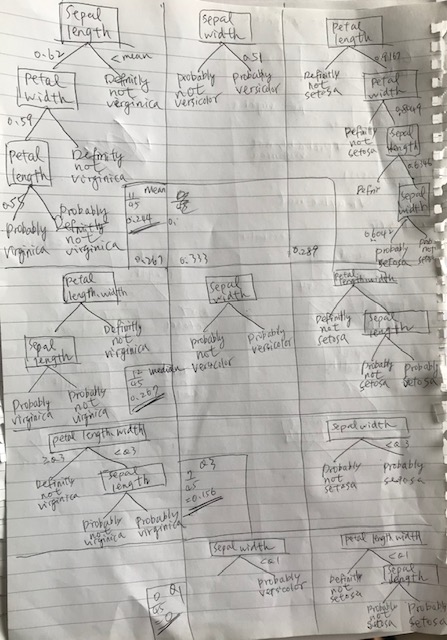

In [140]:
# find the mean for each of the 4 size columns in test dataframe
test_sl_mean = test['sepal-length'].mean()
test_sw_mean = test['sepal-width'].mean()
test_pl_mean = test['petal-length'].mean()
test_pw_mean = test['petal-width'].mean()    
# Print the four means and compare to the output of test.describe() to check that they have been calculated correctly.
print('test_sl_mean = ', test_sl_mean, ' test_sw_mean = ', test_sw_mean)
print('test_pl_mean = ', test_pl_mean, ' test_pw_mean =', test_pw_mean)
print(test.describe())

test_sl_mean =  5.855555555555554  test_sw_mean =  3.095555555555556
test_pl_mean =  3.804444444444444  test_pw_mean = 1.211111111111111
       sepal-length  sepal-width  petal-length  petal-width
count     45.000000    45.000000     45.000000    45.000000
mean       5.855556     3.095556      3.804444     1.211111
std        0.818967     0.448713      1.805416     0.774075
min        4.300000     2.200000      1.100000     0.100000
25%        5.100000     2.800000      1.600000     0.400000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.300000     3.400000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000


In [141]:
test_mean = test.copy() # keep original test dataframe in test and encode in test_mean dataframe
# encode the 4 columns in test dataframe
test_mean['sepal-length'] = test_mean.apply(encode, axis=1, key='sepal-length', indicator=test_sl_mean)
test_mean['sepal-width'] = test_mean.apply(encode, axis=1, key='sepal-width', indicator=test_sw_mean)
test_mean['petal-length'] = test_mean.apply(encode, axis=1, key='petal-length', indicator=test_pl_mean)
test_mean['petal-width'] = test_mean.apply(encode, axis=1, key='petal-width', indicator=test_pw_mean)
display(test_mean.info())
test_mean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 13 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal-length  45 non-null     int64 
 1   sepal-width   45 non-null     int64 
 2   petal-length  45 non-null     int64 
 3   petal-width   45 non-null     int64 
 4   species       45 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


None

,sepal-length,sepal-width,petal-length,petal-width,species
13,0,0,0,0,Iris-setosa
18,0,1,0,0,Iris-setosa
16,0,1,0,0,Iris-setosa
105,1,0,1,1,Iris-virginica
115,1,1,1,1,Iris-virginica


In [142]:
# Decision Tree to get species 
def get_species(df, measure_type):
  # if df['petal-width'] == 0 and df['petal-length'] == 0:
  #       return 'iris-setosa'
  #       if df['petal-width'] == 0:
  #           return 'iris-versicolor'
  #   return 'Iris-virginica' 

  if df['sepal-length'] == 0 and df['petal-width'] == 0 and df['petal-length'] == 0:
    return None
  else:
    return 'Iris-virginica'
  
  # # ADD CODE HERE TO RETURN None if sepal-width is below mean (encoded as 0) , otherwise return 'Iris-versicolor'
  # if df['sepal-width'] == 1:
  #   return None
  # else:
  #   return 'Iris-versicolor'

  # # ADD CODE HERE TO RETURN None if sepal-width is below mean (encoded as 0) , otherwise return 'Iris-setosa'
  # if (df['petal-length'] == 1) and (df['petal-width'] ==1):
  #   return None
  # else :
  #   return 'Iris-setosa' 




In [143]:
# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
def predict_prop(test_df, measure_type):
  correct = 0
  test_size = test_df.shape[0]
  print(test_size)
  for i in range(0, test_size):
    species = get_species(test_df.iloc[i], measure_type)
    if species == test_df.iloc[i]['species']:
        correct += 1
  print(correct)
  return correct / test_size

prop_mean = predict_prop(test_mean, 'mean')
print("Proportion correctly identified Iris-virginica with mean", prop_mean) 

45
16
Proportion correctly identified Iris-virginica with mean 0.35555555555555557


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


In [144]:
# calculate median: can be changed for different calcualations
def cal_median(df, key):
  return df[key].median()

train_sl_median = cal_median(train, 'sepal-length') 
train_sw_median = cal_median(train, 'sepal-width') 
train_pl_median = cal_median(train, 'petal-length') 
train_pw_median = cal_median(train, 'petal-width')     
# Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.
print('train_sl_median = ', train_sl_median, ' train_sw_median = ', train_sw_median)
print('train_pl_median = ', train_pl_median, ' train_pw_median =', train_pw_median)
print(train.describe())

train_sl_median =  5.8  train_sw_median =  3.0
train_pl_median =  4.3  train_pw_median = 1.3
       sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       5.838095     3.036190      3.739048     1.193333
std        0.835784     0.427903      1.754965     0.762116
min        4.400000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.200000      5.100000     1.800000
max        7.900000     4.200000      6.900000     2.500000


In [145]:
encodedmedian_train = train.copy()
# encode each column with median: 1: >= median 0:<median
encodedmedian_train['sepal-length'] = encodedmedian_train.apply(encode, axis=1, key='sepal-length', indicator=train_sl_median)
encodedmedian_train['sepal-width'] = encodedmedian_train.apply(encode, axis=1, key='sepal-width', indicator=train_sw_median)
encodedmedian_train['petal-length'] = encodedmedian_train.apply(encode, axis=1, key='petal-length', indicator=train_pl_median)
encodedmedian_train['petal-width'] = encodedmedian_train.apply(encode, axis=1, key='petal-width', indicator=train_pw_median)
# print(encodedmedian_train)

In [146]:
# Get the dataframes and proportion calcuations of those ON OR ABOVE the median for 3 species
print("---------------value >= median for Iris-virginica-----------------------------------")
prop_sl_vir_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-virginica', 'sepal-length', 'median')
prop_sw_vir_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-virginica', 'sepal-width', 'median') 
prop_pl_vir_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-virginica', 'petal-length', 'median') 
prop_pw_vir_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-virginica', 'petal-width', 'median') 
print("---------------value >= median for Iris-versicolor -----------------------------------")
prop_sl_ver_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-versicolor', 'sepal-length', 'median') 
prop_sw_ver_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-versicolor', 'sepal-width', 'median') 
prop_pl_ver_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-versicolor', 'petal-length', 'median') 
prop_pw_ver_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-versicolor', 'petal-width', 'median') 

print("---------------value >= median for Iris-setosa-----------------------------------")
prop_sl_set_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-setosa', 'sepal-length', 'median') 
prop_sw_set_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-setosa', 'sepal-width', 'median') 
prop_pl_set_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-setosa', 'petal-length', 'median') 
prop_pw_set_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-setosa', 'petal-width', 'median') 


---------------value >= median for Iris-virginica-----------------------------------
sepal-length  - Number of rows =  31 , Total rows above  median  =  53  ,Proportion =  0.5849056603773585
sepal-width  - Number of rows =  19 , Total rows above  median  =  64  ,Proportion =  0.296875
petal-length  - Number of rows =  34 , Total rows above  median  =  54  ,Proportion =  0.6296296296296297
petal-width  - Number of rows =  34 , Total rows above  median  =  61  ,Proportion =  0.5573770491803278
---------------value >= median for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  21 , Total rows above  median  =  53  ,Proportion =  0.39622641509433965
sepal-width  - Number of rows =  12 , Total rows above  median  =  64  ,Proportion =  0.1875
petal-length  - Number of rows =  20 , Total rows above  median  =  54  ,Proportion =  0.37037037037037035
petal-width  - Number of rows =  27 , Total rows above  median  =  61  ,Proportion =  0.4426229508196721
----

In [147]:
# Get the dataframes and proportion calcuations of those BELOW the Median for 3 species
print("-----------------------------------value < median for Iris-virginica -----------------------------------")
prop_sl_vir_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-virginica', 'sepal-length','Median')
# display(df_col1_virginica)
prop_sw_vir_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-virginica', 'sepal-width','Median') 
prop_pl_vir_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-virginica', 'petal-length','Median') 
prop_pw_vir_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-virginica', 'petal-width','Median') 
print("-----------------------------------value < median for Iris-versicolor -----------------------------------")
prop_sl_ver_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-versicolor', 'sepal-length','Median') 
prop_sw_ver_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-versicolor', 'sepal-width','Median') 
prop_pl_ver_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-versicolor', 'petal-length','Median') 
prop_pw_ver_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-versicolor', 'petal-width','Median') 

print("-----------------------------------value < median for Iris-setosa-----------------------------------")
prop_sl_set_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-setosa', 'sepal-length','Median') 
prop_sw_set_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-setosa', 'sepal-width','Median') 
prop_pl_set_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-setosa', 'petal-length','Median') 
prop_pw_set_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-setosa', 'petal-width','Median') 

-----------------------------------value < median for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  3 , Total rows above  Median  =  52  ,Proportion =  0.057692307692307696
sepal-width  - Number of rows =  15 , Total rows above  Median  =  41  ,Proportion =  0.36585365853658536
petal-length  - Number of rows =  0 , Total rows above  Median  =  51  ,Proportion =  0.0
petal-width  - Number of rows =  0 , Total rows above  Median  =  44  ,Proportion =  0.0
-----------------------------------value < median for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  15 , Total rows above  Median  =  52  ,Proportion =  0.28846153846153844
sepal-width  - Number of rows =  24 , Total rows above  Median  =  41  ,Proportion =  0.5853658536585366
petal-length  - Number of rows =  16 , Total rows above  Median  =  51  ,Proportion =  0.3137254901960784
petal-width  - Number of rows =  9 , Total rows above  Median  =  44  ,Proporti

In [148]:
# Create a list of dictionaries from the results of median calculations
propotion_list_median = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_vir_abovemedian,prop_sw_vir_abovemedian,prop_pl_vir_abovemedian,prop_pw_vir_abovemedian],
 'below_indi':[prop_sl_vir_belowmedian,prop_sw_vir_belowmedian,prop_pl_vir_belowmedian,prop_pw_vir_belowmedian]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_ver_abovemedian,prop_sw_ver_abovemedian,prop_pl_ver_abovemedian,prop_pw_ver_abovemedian],
 'below_indi':[prop_sl_ver_belowmedian, prop_sw_ver_belowmedian,prop_pl_ver_belowmedian,prop_pw_ver_belowmedian]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_set_abovemedian,prop_sw_set_abovemedian,prop_pl_set_abovemedian,prop_pw_set_abovemedian],
 'below_indi':[prop_sl_set_belowmedian, prop_sw_set_belowmedian,prop_pl_set_belowmedian,prop_pw_set_belowmedian]
}]
 
display(propotion_list_median)

[{'above_indi': [0.5849056603773585,
   0.296875,
   0.6296296296296297,
   0.5573770491803278],
  'below_indi': [0.057692307692307696, 0.36585365853658536, 0.0, 0.0],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.39622641509433965,
   0.1875,
   0.37037037037037035,
   0.4426229508196721],
  'below_indi': [0.28846153846153844,
   0.5853658536585366,
   0.3137254901960784,
   0.20454545454545456],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.018867924528301886, 0.515625, 0.0, 0.0],
  'below_indi': [0.6538461538461539,
   0.04878048780487805,
   0.6862745098039216,
   0.7954545454545454],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

In [149]:
printout_list(propotion_list_median, 'median')

Iris-virginica 			 >=  median 			<  median
		 sepal-length 			 0.5849056603773585 			  
		 petal-length 			 0.6296296296296297 			  
		 petal-width 			 0.5573770491803278 			  
Iris-versicolor 			 >=  median 			<  median
		 sepal-width 			   			 0.5853658536585366
Iris-setosa 			 >=  median 			<  median
		 sepal-length 			   			 0.6538461538461539
		 sepal-width 			 0.515625 			  
		 petal-length 			   			 0.6862745098039216
		 petal-width 			   			 0.7954545454545454


In [150]:
# propotion_mean = pd.DataFrame.from_dict(propotion_list) 
# # print(propotion_mean)
# propotion_median = pd.DataFrame.from_dict(propotion_list_median) 
# # print(propotion_median)
# table_mean = pd.pivot_table(propotion_mean, values=['above_mean','below_mean'], index=['species','type'],columns=['type']) #, aggfunc=np.sum)
# table_median = pd.pivot_table(propotion_median, values=['above_mean','below_mean'], index=['species','type'],columns=['type'])
# print(table_mean)
# print(table_median)

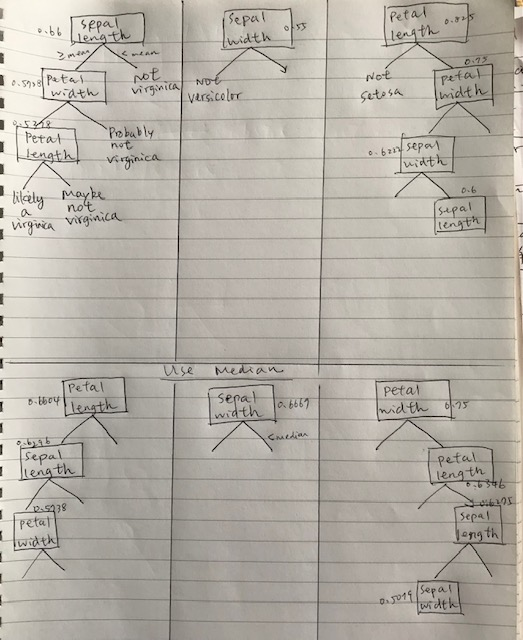

In [151]:

# find the median for each of the 4 size columns in test dataframe : test has original data
test_sl_median = test['sepal-length'].median()
test_sw_median = test['sepal-width'].median()
test_pl_median = test['petal-length'].median()
test_pw_median = test['petal-width'].median()    
# Print the four medians and compare to the output of test.describe() to check that they have been calculated correctly.
print('test_sl_median = ', test_sl_median, ' test_sw_median = ', test_sw_median)
print('test_pl_median = ', test_pl_median, ' test_pw_median =', test_pw_median)
print(test.describe())

test_sl_median =  5.8  test_sw_median =  3.0
test_pl_median =  4.4  test_pw_median = 1.3
       sepal-length  sepal-width  petal-length  petal-width
count     45.000000    45.000000     45.000000    45.000000
mean       5.855556     3.095556      3.804444     1.211111
std        0.818967     0.448713      1.805416     0.774075
min        4.300000     2.200000      1.100000     0.100000
25%        5.100000     2.800000      1.600000     0.400000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.300000     3.400000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000


In [152]:
# test1 has original data and assigns to test2, make changes on test2 and keep original data in test1 
test_median = test.copy()
# encode the 4 columns 
test_median['sepal-length'] = test_median.apply(encode, axis=1, key='sepal-length', indicator=test_sl_median)
test_median['sepal-width'] = test_median.apply(encode, axis=1, key='sepal-width', indicator=test_sw_median)
test_median['petal-length'] = test_median.apply(encode, axis=1, key='petal-length', indicator=test_pl_median)
test_median['petal-width'] = test_median.apply(encode, axis=1, key='petal-width', indicator=test_pw_median)
display(test_median.head())


,sepal-length,sepal-width,petal-length,petal-width,species
13,0,1,0,0,Iris-setosa
18,0,1,0,0,Iris-setosa
16,0,1,0,0,Iris-setosa
105,1,1,1,1,Iris-virginica
115,1,1,1,1,Iris-virginica


In [153]:
# Decision Tree Model to get species based on median calculation: Only for 'Iris-virginica'
def get_species_median(df):
  
  if (df['petal-length'] == 0) or (df['petal-width'] == 0):
    return None
  elif df['sepal-length'] == 0:
    return None
  else:
    return 'Iris-virginica'

def predict_prop_median(test_df):
  # use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
  correct_median = 0
  test_median_size = test_df.shape[0]
  print(test_median_size)
  for i in range(0, test_median_size):
    species = get_species_median(test_df.iloc[i])
    if species == test_df.iloc[i]['species']:
        correct_median += 1
  print(correct_median)
  return correct_median / test_median_size
  
prop_median = predict_prop_median(test_median)
print ("Proportion correctly identified by measuring median", prop_median) 
# prop_median2 = predict_prop(test_median,'median')
# print ("Proportion correctly identified by measuring median", prop_median2) 


# filt_test_vir = test_median['species'] == 'Iris-virginica'
# prop_vir_median = predict_prop(test_median[filt_test_vir], 'median')
# print("Proportion correctly identified mean for Iris-virginica", prop_vir_median) 

# filt_test_ver = test_median['species'] == 'Iris-versicolor'
# prop_ver_median = predict_prop(test_median[filt_test_ver], 'median')
# print("Proportion correctly identified mean for Iris-versicolor", prop_ver_median) 

# filt_test_set = test_median['species'] == 'Iris-setosa'
# prop_set_median = predict_prop(test_median[filt_test_set], 'median')
# print("Proportion correctly identified mean for Iris-setosa", prop_set_median) 

45
16
Proportion correctly identified by measuring median 0.35555555555555557



What do you notice? (write your answer here)

The proportion correctly identified by measuring mean and median have the close results and sometimes the same results. measuring with median seems slightly higher than measuring with mean when they have close results. 

In additions, both of the propotions of petal length, petal width and sepal width on or above mean and median are pretty close to each other. Therefore the 3 types are the key to classfiy the species as 'Iris-virginica'. 

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

In [154]:
# find the Upper quantile for each of the 4 size columns in test dataframe 
sl_q3 = train['sepal-length'].quantile(.75)
sw_q3 = train['sepal-width'].quantile(.75)
pl_q3 = train['petal-length'].quantile(.75)
pw_q3 = train['petal-width'].quantile(.75)   
# Print the four upper quantile and compare to the output of train.describe() to check that they have been calculated correctly.
print('sw_q3 = ', sl_q3, ', sw_q3 = ', sw_q3,', pl_q3 = ', pl_q3, ', pw_q3 =', pw_q3)

print(train.describe())

sw_q3 =  6.4 , sw_q3 =  3.2 , pl_q3 =  5.1 , pw_q3 = 1.8
       sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       5.838095     3.036190      3.739048     1.193333
std        0.835784     0.427903      1.754965     0.762116
min        4.400000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.200000      5.100000     1.800000
max        7.900000     4.200000      6.900000     2.500000


In [155]:
encodedq3_train = train.copy()
# encode each column with upper quantile: 1: >= q3 0:<q3
encodedq3_train['sepal-length'] = encodedq3_train.apply(encode, axis=1, key='sepal-length', indicator=sl_q3)
encodedq3_train['sepal-width'] = encodedq3_train.apply(encode, axis=1, key='sepal-width', indicator=sw_q3)
encodedq3_train['petal-length'] = encodedq3_train.apply(encode, axis=1, key='petal-length', indicator=pl_q3)
encodedq3_train['petal-width'] = encodedq3_train.apply(encode, axis=1, key='petal-width', indicator=pw_q3)
print(encodedq3_train)

     sepal-length  sepal-width  petal-length  petal-width          species
40              0            1             0            0      Iris-setosa
85              0            1             0            0  Iris-versicolor
92              0            0             0            0  Iris-versicolor
111             1            0             1            1   Iris-virginica
53              0            0             0            0  Iris-versicolor
..            ...          ...           ...          ...              ...
147             1            0             1            1   Iris-virginica
86              1            0             0            0  Iris-versicolor
76              1            0             0            0  Iris-versicolor
88              0            0             0            0  Iris-versicolor
141             1            0             1            1   Iris-virginica

[105 rows x 5 columns]


In [156]:
# Get the dataframes and proportion calcuations of those ON OR ABOVE the upper Quantile for 3 species
print("---------------value >= q3 for Iris-virginica -----------------------------------")
prop_sl_vir_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-virginica', 'sepal-length','Upper Quantile')
prop_sw_vir_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-virginica', 'sepal-width','Upper Quantile') 
prop_pl_vir_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-virginica', 'petal-length','Upper Quantile') 
prop_pw_vir_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-virginica', 'petal-width','Upper Quantile') 
print("---------------value >= q3 for Iris-versicolor ---------------------------------")
prop_sl_ver_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-versicolor', 'sepal-length','Upper Quantile') 
prop_sw_ver_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-versicolor', 'sepal-width','Upper Quantile') 
prop_pl_ver_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-versicolor', 'petal-length','Upper Quantile') 
prop_pw_ver_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-versicolor', 'petal-width','Upper Quantile') 

print("---------------value >= q3 for Iris-setosa -----------------------------------")
prop_sl_set_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-setosa', 'sepal-length','Upper Quantile') 
prop_sw_set_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-setosa', 'sepal-width','Upper Quantile') 
prop_pl_set_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-setosa', 'petal-length','Upper Quantile') 
prop_pw_set_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-setosa', 'petal-width','Upper Quantile') 


---------------value >= q3 for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  22 , Total rows above  Upper Quantile  =  31  ,Proportion =  0.7096774193548387
sepal-width  - Number of rows =  7 , Total rows above  Upper Quantile  =  36  ,Proportion =  0.19444444444444445
petal-length  - Number of rows =  27 , Total rows above  Upper Quantile  =  28  ,Proportion =  0.9642857142857143
petal-width  - Number of rows =  31 , Total rows above  Upper Quantile  =  32  ,Proportion =  0.96875
---------------value >= q3 for Iris-versicolor ---------------------------------
sepal-length  - Number of rows =  9 , Total rows above  Upper Quantile  =  31  ,Proportion =  0.2903225806451613
sepal-width  - Number of rows =  4 , Total rows above  Upper Quantile  =  36  ,Proportion =  0.1111111111111111
petal-length  - Number of rows =  1 , Total rows above  Upper Quantile  =  28  ,Proportion =  0.03571428571428571
petal-width  - Number of rows =  1 , Total rows above  

In [157]:
# Get the dataframes and proportion calcuations of those BELOW the upper Quantile for 3 species
print("---------------value < q3 for Iris-virginica-----------------------------------")
prop_sl_vir_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-virginica', 'sepal-length','Upper Quantile')
# display(df_col1_virginica_abovemean)
prop_sw_vir_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-virginica', 'sepal-width','Upper Quantile') 
prop_pl_vir_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-virginica', 'petal-length','Upper Quantile') 
prop_pw_vir_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-virginica', 'petal-width','Upper Quantile') 
print("---------------value < q3 for Iris-versicolor -----------------------------------")
prop_sl_ver_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-versicolor', 'sepal-length','Upper Quantile') 
prop_sw_ver_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-versicolor', 'sepal-width','Upper Quantile') 
prop_pl_ver_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-versicolor', 'petal-length','Upper Quantile') 
prop_pw_ver_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-versicolor', 'petal-width','Upper Quantile') 

print("---------------value < q3 for Iris-setosa -----------------------------------")
prop_sl_set_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-setosa', 'sepal-length','Upper Quantile') 
prop_sw_set_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-setosa', 'sepal-width','Upper Quantile') 
prop_pl_set_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-setosa', 'petal-length','Upper Quantile') 
prop_pw_set_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-setosa', 'petal-width','Upper Quantile') 


---------------value < q3 for Iris-virginica-----------------------------------
sepal-length  - Number of rows =  12 , Total rows above  Upper Quantile  =  74  ,Proportion =  0.16216216216216217
sepal-width  - Number of rows =  27 , Total rows above  Upper Quantile  =  69  ,Proportion =  0.391304347826087
petal-length  - Number of rows =  7 , Total rows above  Upper Quantile  =  77  ,Proportion =  0.09090909090909091
petal-width  - Number of rows =  3 , Total rows above  Upper Quantile  =  73  ,Proportion =  0.0410958904109589
---------------value < q3 for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  27 , Total rows above  Upper Quantile  =  74  ,Proportion =  0.36486486486486486
sepal-width  - Number of rows =  32 , Total rows above  Upper Quantile  =  69  ,Proportion =  0.463768115942029
petal-length  - Number of rows =  35 , Total rows above  Upper Quantile  =  77  ,Proportion =  0.45454545454545453
petal-width  - Number of rows =  35 , Total

In [158]:
# Create a list of dictionaries from the results of q3 calculations
propotion_list_q3 = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_vir_aboveq3,prop_sw_vir_aboveq3,prop_pl_vir_aboveq3,prop_pw_vir_aboveq3],
 'below_indi':[prop_sl_vir_belowq3, prop_sw_vir_belowq3,prop_pl_vir_belowq3,prop_pw_vir_belowq3]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_ver_aboveq3,prop_sw_ver_aboveq3,prop_pl_ver_aboveq3,prop_pw_ver_aboveq3],
 'below_indi':[prop_sl_ver_belowq3, prop_sw_ver_belowq3,prop_pl_ver_belowq3,prop_pw_ver_belowq3]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_set_aboveq3,prop_sw_set_aboveq3,prop_pl_set_aboveq3,prop_pw_set_aboveq3],
 'below_indi':[prop_sl_set_belowq3, prop_sw_set_belowq3,prop_pl_set_belowq3,prop_pw_set_belowq3]
}]
 
display(propotion_list_q3)

[{'above_indi': [0.7096774193548387,
   0.19444444444444445,
   0.9642857142857143,
   0.96875],
  'below_indi': [0.16216216216216217,
   0.391304347826087,
   0.09090909090909091,
   0.0410958904109589],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.2903225806451613,
   0.1111111111111111,
   0.03571428571428571,
   0.03125],
  'below_indi': [0.36486486486486486,
   0.463768115942029,
   0.45454545454545453,
   0.4794520547945205],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.0, 0.6944444444444444, 0.0, 0.0],
  'below_indi': [0.47297297297297297,
   0.14492753623188406,
   0.45454545454545453,
   0.4794520547945205],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

In [159]:
printout_list(propotion_list_q3, 'Q3')

Iris-virginica 			 >=  Q3 			<  Q3
		 sepal-length 			 0.7096774193548387 			  
		 petal-length 			 0.9642857142857143 			  
		 petal-width 			 0.96875 			  
Iris-versicolor 			 >=  Q3 			<  Q3
Iris-setosa 			 >=  Q3 			<  Q3
		 sepal-width 			 0.6944444444444444 			  


In [160]:
# find the q3 for each of the 4 size columns in test dataframe : test has original data
test_sl_q3 = test['sepal-length'].quantile(.75)
test_sw_q3 = test['sepal-width'].quantile(.75)
test_pl_q3 = test['petal-length'].quantile(.75)
test_pw_q3 = test['petal-width'].quantile(.75)   
# Print the four q3 and compare to the output of test.describe() to check that they have been calculated correctly.
print('test_sl_q3 = ', test_sl_q3, ' test_sw_q3 = ', test_sw_q3)
print('test_pl_q3 = ', test_pl_q3, ' test_pw_q3 =', test_pw_q3)
print(test.describe())


test_sl_q3 =  6.3  test_sw_q3 =  3.4
test_pl_q3 =  5.1  test_pw_q3 = 1.8
       sepal-length  sepal-width  petal-length  petal-width
count     45.000000    45.000000     45.000000    45.000000
mean       5.855556     3.095556      3.804444     1.211111
std        0.818967     0.448713      1.805416     0.774075
min        4.300000     2.200000      1.100000     0.100000
25%        5.100000     2.800000      1.600000     0.400000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.300000     3.400000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000


In [161]:
# test1 has original data and assign to test_q3, make changes on test_q3 and keep original data in test1 
test_q3= test.copy()
# encode the 4 columns 
test_q3['sepal-length'] = test_q3.apply(encode, axis=1, key='sepal-length', indicator=test_sl_q3)
test_q3['sepal-width'] = test_q3.apply(encode, axis=1, key='sepal-width', indicator=test_sw_q3)
test_q3['petal-length'] = test_q3.apply(encode, axis=1, key='petal-length', indicator=test_pl_q3)
test_q3['petal-width'] = test_q3.apply(encode, axis=1, key='petal-width', indicator=test_pw_q3)
display(test_q3.head())

,sepal-length,sepal-width,petal-length,petal-width,species
13,0,0,0,0,Iris-setosa
18,0,1,0,0,Iris-setosa
16,0,1,0,0,Iris-setosa
105,1,0,1,1,Iris-virginica
115,1,0,1,1,Iris-virginica


In [162]:
# Decision Tree to get species based on median calculation: Only for 'Iris-virginica'
def get_species_q3(df):
  # ADD CODE HERE TO RETURN None if sepal-length is below mean (encoded as 0) 
  # or if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
  if df['species'] == 'Iris-virginica':
    if (df['petal-length'] == 0) or (df['petal-width'] == 0):
      return None
    elif df['sepal-length'] == 0:
      return None
    else:
      return 'Iris-virginica'

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
def predict_prop_q3(test_df):
  correct_q3 = 0
  test_q3_size = test_df.shape[0]
  print(test_q3_size)
  for i in range(0, test_q3_size):
    species = get_species_q3(test_df.iloc[i])
    if species == test_df.iloc[i]['species']:
        correct_q3 += 1
  print(correct_q3)
  return correct_q3 / test_q3_size
 
prop_q3 = predict_prop_q3(test_q3)
print("Proportion correctly identified by measuring upper quantile", prop_q3) 
prop_q3_1 = predict_prop(test_q3,'upper quantile')
print("Proportion correctly identified by measuring upper quantile", prop_q3_1) 

45
12
Proportion correctly identified by measuring upper quantile 0.26666666666666666
45
15
Proportion correctly identified by measuring upper quantile 0.3333333333333333


In [163]:
# find the lower quantile for each of the 4 size columns in test dataframe 
sl_q1 = train['sepal-length'].quantile(.25)
sw_q1 = train['sepal-width'].quantile(.25)
pl_q1 = train['petal-length'].quantile(.25)
pw_q1 = train['petal-width'].quantile(.25)   
# Print the four upper quantile and compare to the output of train.describe() to check that they have been calculated correctly.
print('sw_q1 = ', sl_q1, ' , sw_q1 = ', sw_q1,', pl_q1 = ', pl_q1, ', pw_q1 =', pw_q1)
print(train.describe())

sw_q1 =  5.1  , sw_q1 =  2.8 , pl_q1 =  1.6 , pw_q1 = 0.3
       sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       5.838095     3.036190      3.739048     1.193333
std        0.835784     0.427903      1.754965     0.762116
min        4.400000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.200000      5.100000     1.800000
max        7.900000     4.200000      6.900000     2.500000


In [164]:
# assign a copy of train dataframe to new variable. train has origainal dataset
encodedq1_train = train.copy()
# encode each column with lower quantile: 1: >= q1 0:<q1
encodedq1_train['sepal-length'] = encodedq1_train.apply(encode, axis=1, key='sepal-length', indicator=sl_q1)
encodedq1_train['sepal-width'] = encodedq1_train.apply(encode, axis=1, key='sepal-width', indicator=sw_q1)
encodedq1_train['petal-length'] = encodedq1_train.apply(encode, axis=1, key='petal-length', indicator=pl_q1)
encodedq1_train['petal-width'] = encodedq1_train.apply(encode, axis=1, key='petal-width', indicator=pw_q1)
print(encodedq1_train)

     sepal-length  sepal-width  petal-length  petal-width          species
40              0            1             0            1      Iris-setosa
85              1            1             1            1  Iris-versicolor
92              1            0             1            1  Iris-versicolor
111             1            0             1            1   Iris-virginica
53              1            0             1            1  Iris-versicolor
..            ...          ...           ...          ...              ...
147             1            1             1            1   Iris-virginica
86              1            1             1            1  Iris-versicolor
76              1            1             1            1  Iris-versicolor
88              1            1             1            1  Iris-versicolor
141             1            1             1            1   Iris-virginica

[105 rows x 5 columns]


In [165]:
# Get the dataframes and proportion calcuations of those ON OR ABOVE the Lower Quantile for 3 species
print("---------------value >= q1 for Iris-virginica -----------------------------------")
prop_sl_vir_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-virginica', 'sepal-length', 'Q1')
prop_sw_vir_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-virginica', 'sepal-width', 'Q1') 
prop_pl_vir_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-virginica', 'petal-length', 'Q1') 
prop_pw_vir_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-virginica', 'petal-width', 'Q1') 
print("---------------value >= q1 for Iris-versicolor -----------------------------------")
prop_sl_ver_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-versicolor', 'sepal-length', 'Q1') 
prop_sw_ver_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-versicolor', 'sepal-width', 'Q1') 
prop_pl_ver_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-versicolor', 'petal-length', 'Q1') 
prop_pw_ver_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-versicolor', 'petal-width', 'Q1') 

print("---------------value >= q1 for Iris-setosa -----------------------------------")
prop_sl_set_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-setosa', 'sepal-length', 'Q1') 
prop_sw_set_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-setosa', 'sepal-width', 'Q1') 
prop_pl_set_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-setosa', 'petal-length', 'Q1') 
prop_pw_set_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-setosa', 'petal-width', 'Q1') 


---------------value >= q1 for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  33 , Total rows above  Q1  =  82  ,Proportion =  0.4024390243902439
sepal-width  - Number of rows =  26 , Total rows above  Q1  =  81  ,Proportion =  0.32098765432098764
petal-length  - Number of rows =  34 , Total rows above  Q1  =  79  ,Proportion =  0.43037974683544306
petal-width  - Number of rows =  34 , Total rows above  Q1  =  79  ,Proportion =  0.43037974683544306
---------------value >= q1 for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  34 , Total rows above  Q1  =  82  ,Proportion =  0.4146341463414634
sepal-width  - Number of rows =  21 , Total rows above  Q1  =  81  ,Proportion =  0.25925925925925924
petal-length  - Number of rows =  36 , Total rows above  Q1  =  79  ,Proportion =  0.45569620253164556
petal-width  - Number of rows =  36 , Total rows above  Q1  =  79  ,Proportion =  0.45569620253164556
---------------va

In [166]:
# Get the dataframes and proportion calcuations of those BELOW the Lower Quantile for 3 species
print("---------------value < q1 for Iris-virginica -----------------------------------")
prop_sl_vir_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-virginica', 'sepal-length', 'Q1')
prop_sw_vir_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-virginica', 'sepal-width', 'Q1') 
prop_pl_vir_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-virginica', 'petal-length', 'Q1') 
prop_pw_vir_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-virginica', 'petal-width', 'Q1') 
print("---------------value >= q1 for Iris-versicolor -----------------------------------")
prop_sl_ver_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-versicolor', 'sepal-length', 'Q1') 
prop_sw_ver_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-versicolor', 'sepal-width', 'Q1') 
prop_pl_ver_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-versicolor', 'petal-length', 'Q1') 
prop_pw_ver_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-versicolor', 'petal-width', 'Q1') 

print("---------------value >= q1 for Iris-setosa -----------------------------------")
prop_sl_set_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-setosa', 'sepal-length', 'Q1') 
prop_sw_set_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-setosa', 'sepal-width', 'Q1') 
prop_pl_set_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-setosa', 'petal-length', 'Q1') 
prop_pw_set_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-setosa', 'petal-width', 'Q1') 


---------------value < q1 for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  1 , Total rows above  Q1  =  23  ,Proportion =  0.043478260869565216
sepal-width  - Number of rows =  8 , Total rows above  Q1  =  24  ,Proportion =  0.3333333333333333
petal-length  - Number of rows =  0 , Total rows above  Q1  =  26  ,Proportion =  0.0
petal-width  - Number of rows =  0 , Total rows above  Q1  =  26  ,Proportion =  0.0
---------------value >= q1 for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  2 , Total rows above  Q1  =  23  ,Proportion =  0.08695652173913043
sepal-width  - Number of rows =  15 , Total rows above  Q1  =  24  ,Proportion =  0.625
petal-length  - Number of rows =  0 , Total rows above  Q1  =  26  ,Proportion =  0.0
petal-width  - Number of rows =  0 , Total rows above  Q1  =  26  ,Proportion =  0.0
---------------value >= q1 for Iris-setosa -----------------------------------
sepal-length  - Number

In [167]:
# Create a list of dictionaries from the results of q3 calculations
propotion_list_q1 = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_vir_aboveq1,prop_sw_vir_aboveq1,prop_pl_vir_aboveq1,prop_pw_vir_aboveq1],
 'below_indi':[prop_sl_vir_belowq1, prop_sw_vir_belowq1,prop_pl_vir_belowq1,prop_pw_vir_belowq1]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_ver_aboveq1,prop_sw_ver_aboveq1,prop_pl_ver_aboveq1,prop_pw_ver_aboveq1],
 'below_indi':[prop_sl_ver_belowq1, prop_sw_ver_belowq1,prop_pl_ver_belowq1,prop_pw_ver_belowq1]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_set_aboveq1,prop_sw_set_aboveq1,prop_pl_set_aboveq1,prop_pw_set_aboveq1],
 'below_indi':[prop_sl_set_belowq1, prop_sw_set_belowq1,prop_pl_set_belowq1,prop_pw_set_belowq1]
}]
 
display(propotion_list_q1)

[{'above_indi': [0.4024390243902439,
   0.32098765432098764,
   0.43037974683544306,
   0.43037974683544306],
  'below_indi': [0.043478260869565216, 0.3333333333333333, 0.0, 0.0],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.4146341463414634,
   0.25925925925925924,
   0.45569620253164556,
   0.45569620253164556],
  'below_indi': [0.08695652173913043, 0.625, 0.0, 0.0],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.18292682926829268,
   0.41975308641975306,
   0.11392405063291139,
   0.11392405063291139],
  'below_indi': [0.8695652173913043, 0.041666666666666664, 1.0, 1.0],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

In [168]:
printout_list(propotion_list_q1,'Q1')


Iris-virginica 			 >=  Q1 			<  Q1
Iris-versicolor 			 >=  Q1 			<  Q1
		 sepal-width 			   			 0.625
Iris-setosa 			 >=  Q1 			<  Q1
		 sepal-length 			   			 0.8695652173913043
		 petal-length 			   			 1.0
		 petal-width 			   			 1.0


In [169]:
# find the q1 for each of the 4 size columns in test dataframe : test has original data
test_sl_q1 = test['sepal-length'].quantile(.25)
test_sw_q1 = test['sepal-width'].quantile(.25)
test_pl_q1 = test['petal-length'].quantile(.25)
test_pw_q1 = test['petal-width'].quantile(.25)   
# Print the four medians and compare to the output of test.describe() to check that they have been calculated correctly.
print('test_sl_q1 = ', test_sl_q1, ' test_sw_q1 = ', test_sw_q1)
print('test_pl_q1 = ', test_pl_q1, ' test_pw_q1 =', test_pw_q1)
print(test.describe())


test_sl_q1 =  5.1  test_sw_q1 =  2.8
test_pl_q1 =  1.6  test_pw_q1 = 0.4
       sepal-length  sepal-width  petal-length  petal-width
count     45.000000    45.000000     45.000000    45.000000
mean       5.855556     3.095556      3.804444     1.211111
std        0.818967     0.448713      1.805416     0.774075
min        4.300000     2.200000      1.100000     0.100000
25%        5.100000     2.800000      1.600000     0.400000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.300000     3.400000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000


In [170]:
# test1 has original data and assign to test_q3, make changes on test_q3 and keep original data in test1 
test_q1= test.copy()
# encode the 4 columns 
test_q1['sepal-length'] = test_q1.apply(encode, axis=1, key='sepal-length', indicator=test_sl_q1)
test_q1['sepal-width'] = test_q1.apply(encode, axis=1, key='sepal-width', indicator=test_sw_q1)
test_q1['petal-length'] = test_q1.apply(encode, axis=1, key='petal-length', indicator=test_pl_q1)
test_q1['petal-width'] = test_q1.apply(encode, axis=1, key='petal-width', indicator=test_pw_q1)
display(test_q1.head())

,sepal-length,sepal-width,petal-length,petal-width,species
13,0,1,0,0,Iris-setosa
18,1,1,1,0,Iris-setosa
16,1,1,0,1,Iris-setosa
105,1,1,1,1,Iris-virginica
115,1,1,1,1,Iris-virginica


In [171]:
# Decision Tree to get species based on Lower Quantile calculation: Only for 'Iris-virginica'
def get_species_q1(df):
  # ADD CODE HERE TO RETURN None if sepal-length is below lower quantile (encoded as 0) 
  # or if petal-width is below lower quantile (encoded as 0) or if petal-length is below lower quantile (encoded as 0), otherwise return 'Iris-virginia'
  if df['sepal-length'] == 1:
    return None
  elif (df['petal-length'] == 1) or (df['petal-width'] == 1):
    return None
  else:
    return 'Iris-virginica'
# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct_q1 = 0
test_q1_size = test_q1.shape[0]
print(test_q1_size)
for i in range(0, test_q1_size):
  species = get_species_q1(test_q1.iloc[i])
  if species == test_q1.iloc[i]['species']:
      correct_q1 += 1
print(correct_q1)
print ("Proportion correctly identified by measuring lower quantile", correct_q1 / test_q1_size) 

prop_q1_1 = predict_prop(test_q1,'lower quantile')
print("Proportion correctly identified by measuring lower quantile", prop_q1_1) 


45
0
Proportion correctly identified by measuring lower quantile 0.0
45
16
Proportion correctly identified by measuring lower quantile 0.35555555555555557



Measuring with upper quantile (Q3) is higer correctly identified then using lower quantile (Q1).  Also, with Q3, 3 key elements are still Petal widht, petal length, and sepal length. It's smilar to measuring with mean and median.

However, the proportion is lower then mean and median.  so by measuring with mean and median and Q3 are sensitive. 

The propotion correctly identified by measuring mean and median are quite close and the propotion correctly mean > median > q3 > q1

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

In [172]:
# Decision Tree to get species : Only for 'Iris-versicolor'
def get_species_mean_ve(df):
  # ADD CODE HERE TO RETURN None if sepal-width is below mean (encoded as 0) , otherwise return 'Iris-versicolor'
  if df['species'] == 'Iris-versicolor':
    if df['sepal-width'] == 1:
      return None
    else:
      return 'Iris-versicolor'
  
  

def get_species_mean_se(df):  
  # ADD CODE HERE TO RETURN None if sepal-width is below mean (encoded as 0) , otherwise return 'Iris-setosa'
  if df['species'] == 'Iris-setosa':
    if (df['petal-length'] == 1):
      return None
    elif (df['petal-width'] ==1):
      return None
    elif (df['sepal-length'] == 1):
      return None
    elif (df['sepal-width'] == 0):
      return None
    else :
      return 'Iris-setosa' 

prop_mean = predict_prop(test_mean, 'mean')
print("Proportion correctly identified Iris-virginica with mean", prop_mean)

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct_mean_ve = 0
test_size = test_mean.shape[0]
print(test_size)
for i in range(0, test_size):
  species_ve = get_species_mean_ve(test_mean.iloc[i])
  if species_ve == test_mean.iloc[i]['species']:
      correct_mean_ve += 1
print(correct_mean_ve)
print ("Proportion correctly identified for Iris-versicolor with mean", correct_mean_ve / test_size) 

correct_mean_se = 0
test_size = test_mean.shape[0]
print(test_size)
for i in range(0, test_size):
  species_se = get_species_mean_se(test_mean.iloc[i])
  if species_se == test_mean.iloc[i]['species']:
      correct_mean_se += 1
print(correct_mean_se)
print ("Proportion correctly identified for Iris-setosa with mean", correct_mean_se / test_size) 


45
16
Proportion correctly identified Iris-virginica with mean 0.35555555555555557
45
13
Proportion correctly identified for Iris-versicolor with mean 0.28888888888888886
45
13
Proportion correctly identified for Iris-setosa with mean 0.28888888888888886


# Conclusion of the simple decision tree model

From the proportion of correctly identified with mean results above, the model does identify the species for Iris Virginica is higher than identifiying for Iris-versicolor and Iris-setosa with mean. 

Decision trees are commonly used for classification in many machine learning projects. In this project, I separated the decision tree the all 3 species for different measurements. However, a nested decision tree if-statement might be used to do the same job. 

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

In [173]:
# converting data frame to csv
iris_data.to_csv("iris_withheaders.csv", header=names, index=False)
  
# display modified csv file
iris_data_new = pd.read_csv("iris_withheaders.csv")
print('\nModified file:')
print(iris_data_new)


Modified file:
     sepal-length  sepal-width  petal-length  petal-width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


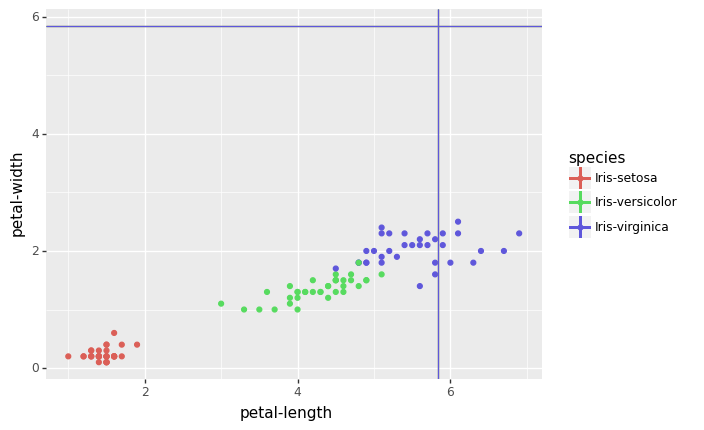

<ggplot: (8790586201361)>

In [174]:
from plotnine import *
## this type of plot will show the distribution on a chart
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))

# New Logic 1 - Classification tree for Iris data
These are used to classify discrete variables. For example, classifying if the temperature of a day will be high or low, or predicting if a team will win the match or not.

In [ ]:
# Libriaires used 
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz

Step 1 - Load Iris data

We are using iris_data_new which has added headers.

Step 2 - Manually encode species 

Use pandas .map function to encode the species and add to a new column 'class'

In [175]:
# Manually encode the species to class in numbers
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# create a class column for the encoded species
iris_data_new['class'] = iris_data_new['species'].map(label_map)
iris_data_new

,sepal-length,sepal-width,petal-length,petal-width,species,class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


Step 3 - Using numpy where and isnan method to check missing data for the 4 feature columns data

In [176]:

# Remove species column and drop any null value in the new iris_data_new dataset 
# Then set x = 4 columns data and y = class column values
X = iris_data_new.drop(labels=['species','class'],axis=1).values  # each row of all 4 columns data in an array
y = iris_data_new['class'].values # All class in an array 
print("Any missing data? ", len(np.where(np.isnan(X))[0])) # use numpy to check any null 


Any missing data?  0


Step 4 - Split into train and test data sets

Use train_test_split() function in sklearn.model_selection to split into train and test data sets

In [177]:
# Use train_test_split() function in sklearn.model_selection to split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print('4 columns train data size  - ', X_train.shape)
print('4 columns test data size  - ', X_test.shape)

4 columns train data size  -  (105, 4)
4 columns test data size  -  (45, 4)


Step 5 - Set up a function to draw Decision regions chart

Using matplotlib.pyplot to draw a scatter plot. 

In [178]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    # coordinate matrices from coordinate vectors.
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
            alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

Step 6 - Use PCA to reduce 4 features to 2 dimention for visidualisation

In [179]:

pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)
test_reduced = pca.transform(X_test)

Step 7 - Create Decision Tree Classifier Model and use 2 dimentions train data to fit the model. Then to predict the classifications.

A decision tree will create a tree based on train data. The tree will generate lots rules. The final rules will predict the new samples. 

Parameters used:

*   criterion: criteria standard，gini/entropy. default = gini
*   max_depth: the maxium depth of the tree
*   random_state: random nodes, to make sure each training has the same results need to be plitter=random

Attributes:
*   .feature_importances_: To see the importance of model feature.

Methods:

*   fit: Use 2 dimentional train data and class to fit model.
*   predict: predict the 2 dimentional train data and return predict class.
*   score: return predicit successfully ratio 
*   predict_proba: the probabiblity of predicting each class
*   get_depth: to get the depth of the tree

In [225]:


# Build Logistic model : with criterion standard entropy (for information gain)
decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=42)

# Build a decision tree classifier from the training set (X, y) : Use 2 dimentional train data to fit the model
decisionTreeModel.fit(train_reduced, y_train)

# To predict classifier with 2 dimentional train data 
predicted = decisionTreeModel.predict(train_reduced)

train set accurancy:  1.0


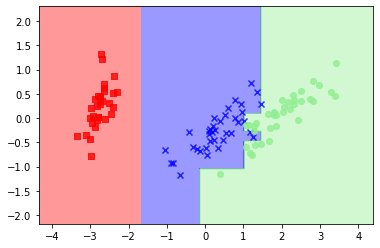

In [226]:
# Draw the decision regions : using the 2 dimentional train data, class train data, with the Logistic model 
plot_decision_regions(train_reduced, y_train, decisionTreeModel)
# Return predicit successfully ratio
print('train set accurancy: ',decisionTreeModel.score(train_reduced, y_train))

test set accurancy:  0.9777777777777777


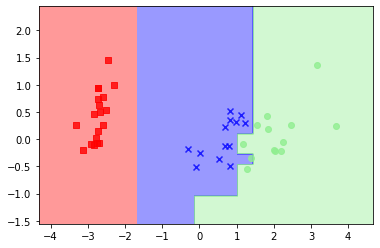

In [181]:
# Draw the decision regions : using the 2 dimentional test data, class test data,  
plot_decision_regions(test_reduced, y_test, decisionTreeModel)
# Return predicit successfully ratio
print('test set accurancy: ',decisionTreeModel.score(test_reduced, y_test))

Extra 1 - The prediction accurancy is slightly less, becuase in the train, it seems not fit probably. 

In [182]:
# create model  : with criterion standard gini as index
decisionTreeModel = DecisionTreeClassifier(criterion = 'gini', max_depth=3 ,random_state=42)

# Build a decision tree classifier from the training set (X, y) : Use 2 dimentional train data to fit the model
decisionTreeModel.fit(X_train, y_train)

# Return predicit successfully ratio
print('train set accurancy: ' , decisionTreeModel.score(X_train, y_train))
print('test set accurancy: ' , decisionTreeModel.score(X_test, y_test))

train set accurancy:  0.9523809523809523
test set accurancy:  1.0


In [183]:
print('the importance of model feature : ' , decisionTreeModel.feature_importances_)

the importance of model feature :  [0.         0.         0.92510833 0.07489167]


Extra 2 - Visualisation the Decision Tree

Use graphviz and export_graphviz libraries to draw a real decision tree.

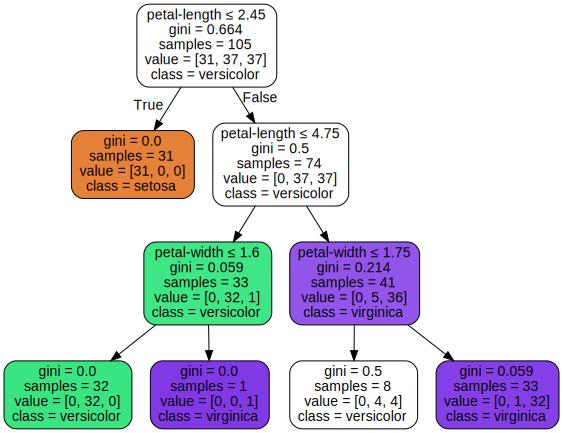

In [184]:

# Export a decision tree in DOT format.
# This function generates a GraphViz representation of the decision tree,
dot_data = export_graphviz(decisionTreeModel, out_file=None, 
                         feature_names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
# DOT source code string to be rendered by Graphviz 
graph = graphviz.Source(dot_data) 
graph

# New Logic 2 - Logistic Regression

Logistic regression is a classification algorithms. It's transformed from linear regression. Linear regression is used to predict a continously values. Logistic regression is used to process classification. Logistic regression uses sigmoid function to present a probability of the classification. 

In [ ]:
# libraies used 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

pandas, numpy, matplotlib.pyplot, seaborn have been used to process data and visualisation. The same dataset iris_data_new will be used here too. 

Step 1 - Load Iris_data_new 

Step 2 - Encode species column 

Use pandas .map function to encode the species column then save in class column. (which is done in the new logic 1 Classfication tree)


Step 3 - Check if any missing data

train = train.dropna()

Step 4 - Split into train and test data (which is done in the new logic 1 Classfication tree)

Use train_test_split() function in sklearn.model_selection to split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


In [222]:
# labels = iris_data_new['species']
# X = iris_data_new.drop(['species','class'],axis=1).values  # each row of all 4 columns data in an array
# # Check missing data in X set
# print("check missing data :", len(np.where(np.isnan(X))[0]) )
# y = iris_data_new['class'].values # All class in an array 
# # print(X)

In [221]:
# # Use train_test_split() function in sklearn.model_selection to split into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print('4 columns train data size  - ', X_train.shape)
print('4 columns test data size  - ', X_test.shape)


4 columns train data size  -  (105, 4)
4 columns test data size  -  (45, 4)


In [223]:
expected = (iris_data_new.shape[0]*70)/100
actual = train.shape[0]
if actual == expected:
  print("Train-test split works fine with train set having", actual,"data points and test having", test.shape[0], "data points")
else:
  print("Expected train data set to have", expected, "points but got", actual)



Train-test split works fine with train set having 105 data points and test having 45 data points


Step 5 - Build Logistic Regression Model 

Logistic regression is transformed from linear regression. It is a classification algorithms. It is suitable for solving a classification problem. It is named 'Logistic Regression' because its underlying technique is quite the same as Linear Regression. The term “Logistic” is taken from the Logit function that is used in this method of classification.

Source : https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102#:~:text=Logistic%20Regression%20is%20one%20of,in%20this%20method%20of%20classification.

Using LogisticRegression from sklearn.linear_model and metrics from sklearn

parameters 

*   penalty : Normalisation 1 / 12. To prevent that the model to over fit problem. 
*   C : the bigger C the less control on weight. default =1. If the model is over fitted, set up 0.6 then reduce. 
*   n_init : default = 10. random initialise and it will choose the best one as the model
*   solver : choice of optimisers.  newtoncg.lbfgs, liblinear, sag.saga. default = liblinear
*   max_lter : the number of maximum literation. default = 100
*   class_weight: setting balance for data balance problem. default = None
*   random_state : set up this will get the same result. Random nodes works only when solver = sag / liblinear

Attributes

*   coef_ : get slope 
*   intercept_ : get intercept 

Methods 

*   fit : put x, y in fit the model 
*   predict : predict and return the predict class
*   predict_proba : predict the probability of each class
*   score: the ratio of predict successfull


In [210]:

# Build Logistic Regression Model
logisticModel = LogisticRegression(random_state=0)

# Put X, y train data in the model
logisticModel.fit(X_train, y_train)
 

In [217]:
# Use train set to predict the classfication 
predicted = logisticModel.predict(X_train)
#comparing prediction result to actual train data to get accuracy   
print('Train accuracy for logistic regression model:', metrics.accuracy_score(y_train, predicted)* 100,'%\n\n') 

Train accuracy for logistic regression model: 96.19047619047619 %




In [218]:
# applying predict to test data set : Use test set to predict the classfication 
y_pred = logisticModel.predict(X_test) 
#comparing prediction result to actual test data to get accuracy 
print('Test accuracy for logistic regression model:', metrics.accuracy_score(y_test, y_pred)* 100,'%\n\n') 

Test accuracy for logistic regression model: 100.0 %




Step 6 - Evaluate score 

Use score method to caculate the socre (the ratio of predict successfully) 

In [219]:
print("train set accurancy:  ", logisticModel.score(X_train, y_train))
print("test set accurancy:  ", logisticModel.score(X_test, y_test))

train set accurancy:   0.9619047619047619
test set accurancy:   1.0


We have only 45 of test set size. It's a small dataset, so the accurancy of test set is really high. 

Step 7 - Visdualistion of the true classification

In [212]:
# Build train set as a dataframe and assign to a variable 
df_train = pd.DataFrame(X_train)
df_train['class'] = y_train
df_train.columns =['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
# print(df_train)
# Do the same for test set. Build test set as a dataframe and assign to a variable
df_test = pd.DataFrame(X_test)
df_test['class'] = y_test
# print(df_test)

Draw a lmplot to show the true results

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


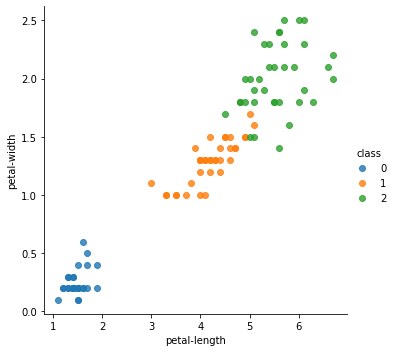

In [213]:

sns.lmplot("petal-length", "petal-width", hue='class', data=df_train, fit_reg=False)

Logistic Regression train set predict result

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


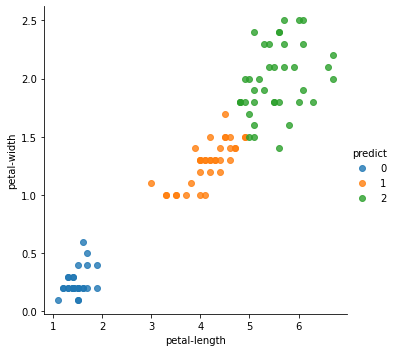

In [220]:
df_train['predict'] = predicted
sns.lmplot("petal-length", "petal-width", hue='predict', data=df_train, fit_reg=False)

# EDA (Exploratory Data Analysis)  


---
The main concept is visualisating data through analynising numbers statistic. The adventage of EDA is understanding data status in various ways for model anaylise later. 

In [193]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Kernel Density Estimation(KDE)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb7c2a9850>,
      dtype=object)

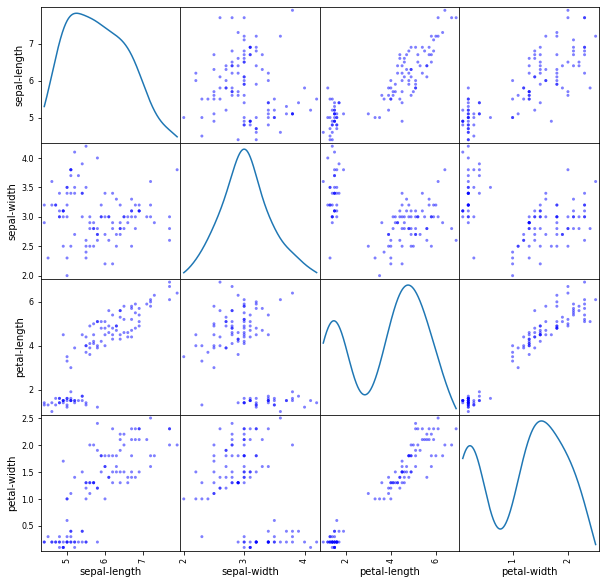

In [194]:
scatter_matrix(train,figsize=(10, 10),color='b',diagonal='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


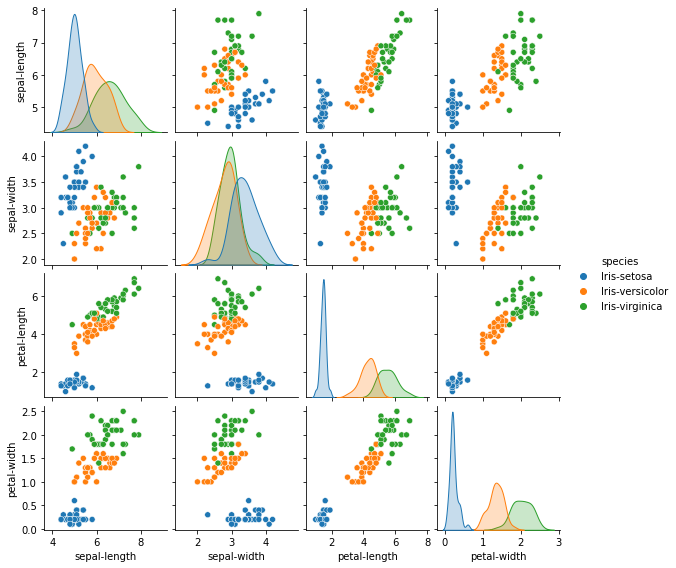

In [195]:
sns.pairplot(train, hue="species", size=2, diag_kind="kde")

# Histograms plot

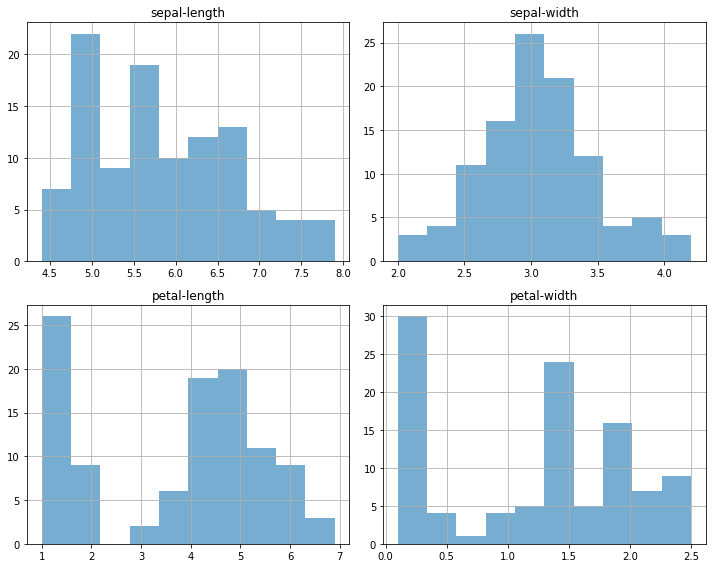

In [196]:
#histograms
train.hist(alpha=0.6, figsize=(10, 8)) 
plt.tight_layout()
plt.show()

# Plot a simple linear relationship between two variables
Using scatter charts to check the between 4 types of features 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


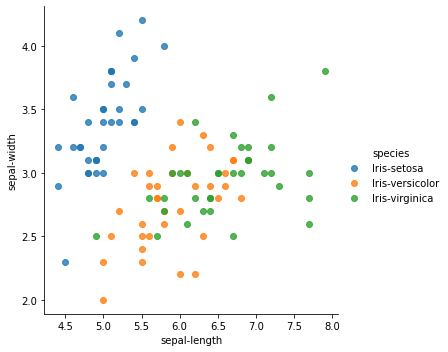

In [197]:
# plot a relationship between sepal-length and sepal-width
sns.lmplot("sepal-length", "sepal-width", hue='species', data=train, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


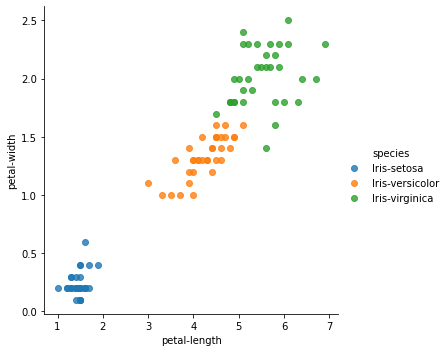

In [198]:
# plot a relationship between petal-length and petal-width
sns.lmplot("petal-length", "petal-width", hue='species', data=train, fit_reg=False)

# correlation map

Since there is a strong suggestion of correlation between the features, let's generate a correlation map to see how features are correlated. So here is a heatmap using seaborn.






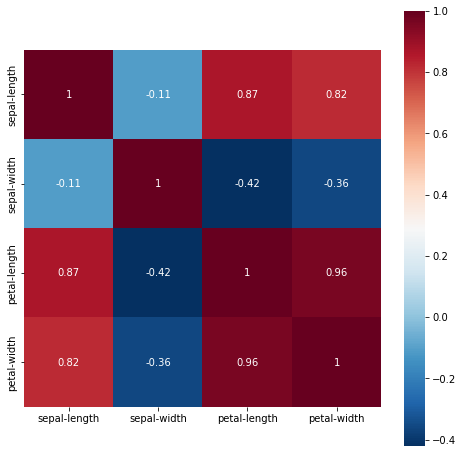

In [199]:
#corrlation heatmap : correlation calculate
plt.figure(figsize=(8,8))
sns.heatmap(iris_data.corr(), square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"

# Distribution Status
Using distplot to check the how to data spreads for each column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 0, 'petal-width'), Text(0.5, 1.0, 'distribution of petal-width')]

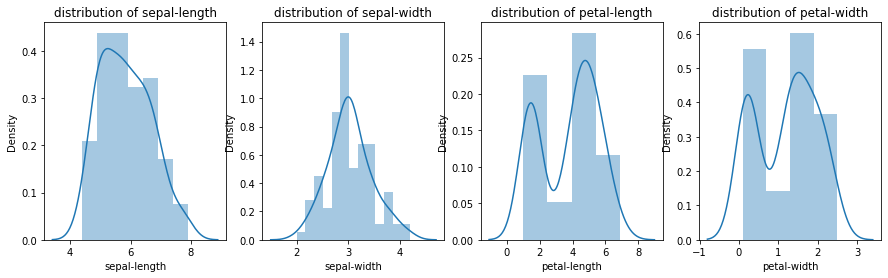

In [200]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(train["sepal-length"][:],ax=axes[0])
sns.distplot(train["sepal-width"][:],ax=axes[1])
sns.distplot(train["petal-length"][:],ax=axes[2])
sns.distplot(train["petal-width"][:],ax=axes[3])

axes[0].set(xlabel='sepal-length',title="distribution of sepal-length")
axes[1].set(xlabel='sepal-width',title="distribution of sepal-width")
axes[2].set(xlabel='petal-length',title="distribution of petal-length")
axes[3].set(xlabel='petal-width',title="distribution of petal-width")

# Outlier Status
Using Boxplot to see the outlier status of each column and see if any outlier.

Text(0.5, 1.0, 'petal-width')

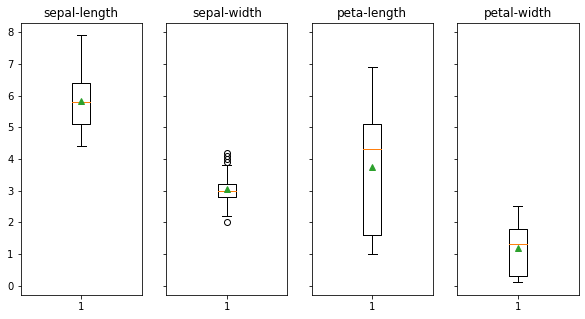

In [224]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,5), sharey=True)
axes[0].boxplot(train['sepal-length'],showmeans=True)
axes[0].set_title('sepal-length')

axes[1].boxplot(train['sepal-width'],showmeans=True)
axes[1].set_title('sepal-width')

axes[2].boxplot(train['petal-length'],showmeans=True)
axes[2].set_title('peta-length')

axes[3].boxplot(train['petal-width'],showmeans=True)
axes[3].set_title('petal-width')



# Reflection


---

What skills have I demonstrated in completing this Project?

I have used the skills of data retrieval, cleaning, filtering, encoding, test-train method, statistics calculation and created a simple decision tree model. The libraries I used in the project are pandas, numpy, sklearn, matplotlib, scatter_matrix, plotnine and seaborn. 

*   pandas library for retrieving, sorting and cleaning the data.
*   Use **kwds when passing a variable number keyword arguments (keys and values) 
*   filter dataframe 
*   sklearn to do train-test split
*   create and print out list of dictionaries
*   both matplotlib and seaborn for visualisations
*   seaborn for correlation heat map
*   plotnine to do ggplots
*   user defined functions for error testing and other set of operations.



What did I learn in this project?

I am using test-train split for the first time and find it very useful for testing out my codes/models to make sure it works for any data set. Although, I have done logistic regression in R, this is the first time for me to use logistic regression to build a model in python. I find it very easy and quick to do. However, I did get a warning about convergence and I will have to look into how to fix it for the future. There may be other better ways to do logistic regression in python which I will explore in the future.



What are the most challenge / difficult parts?

*   Encode data - Tricky to get it right.
*   Calculate propotion - you need to fetch the correct data to to calculate.
*   Create correct decision tree models - It was tricky to draw the tree, because tree might change a bit if you rerun the code. 



Where do I learnt the skills used in this project?
*   **kwds -  https://www.w3schools.com/python/gloss_python_function_arbitrary_keyword_arguments.asp, 
https://www.geeksforgeeks.org/args-kwargs-python/

*   filter dataframe - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

*   sklearn train-test split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

*   dictionaries - https://www.w3schools.com/python/python_dictionaries.asp

*   matplotlib - https://matplotlib.org/stable/plot_types/index.html

*   seaborn - https://seaborn.pydata.org/tutorial.html

*   plotnine - https://plotnine.readthedocs.io/en/stable/

*   machine learning - https://www.w3schools.com/python/python_ml_decision_tree.asp